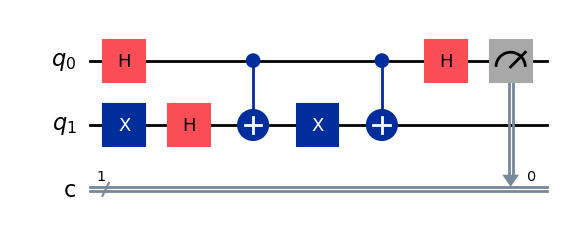

In [1]:
# Deutsch Algorithm
# It's a quantum algorithm for demonstrating the capabilities of quantum computers 
# that achieves advantage over classical algorithms. In this simple example
# it is used to understand if an oracle (basically a black box implementing a fucntion)
# has either odd or even parity

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

# q[0] is the first and only qubit
# q[1] is the ancilla
# Note that all qubits are iniziatlized with |0> state in qiskit

circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.h(qreg_q[1])

# now the first qubit is in state |+>
# the ancilla bit is the state |->

# the three following gates represent the oracle
# here the oracle has even parity f(0)=1 and f(1)=1
circuit.cx(qreg_q[0], qreg_q[1])
circuit.x(qreg_q[1])
circuit.cx(qreg_q[0], qreg_q[1])


circuit.h(qreg_q[0])
circuit.measure(qreg_q[0], creg_c[0])
circuit.draw('mpl')

In [2]:
# Adding the transpiler to reduce the circuit to QASM instructions
# supported by the backend
from qiskit import transpile
# Use AerSimulator
from qiskit_aer import AerSimulator
backend = AerSimulator()

# First we have to transpile the quantum circuit
# to the low-level QASM instructions used by the
# backend
qc_compiled = transpile(circuit, backend)

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 64, because in this case since we use a perfect noiseless 
# simulator we just get always the correcr result
job_sim = backend.run(qc_compiled, shots=64)
# Grab the results from the job.
result_sim = job_sim.result()
counts = result_sim.get_counts(qc_compiled)
print(counts)

{'0': 64}


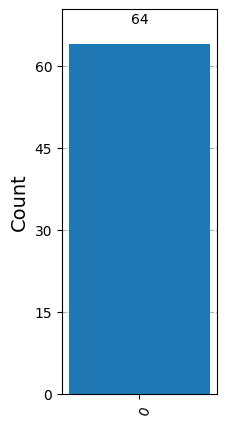

In [3]:
from qiskit.visualization import plot_histogram
plot_histogram(counts, figsize=(2,5))